<a href="https://colab.research.google.com/github/KHUSH445/ML_LAB/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mirichoi0218/insurance")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: khushboovirwani
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance


100%|██████████| 16.0k/16.0k [00:00<00:00, 9.07MB/s]

In [18]:
import pandas as pd
import numpy as np

df = pd.read_csv("./insurance/insurance.csv")
display(df.head())
df.info()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# Feature and target split
X = df.drop("charges", axis=1)
y = df["charges"]

# One-hot encode the categorical features
X_encoded = pd.get_dummies(X, drop_first=True)
display(df.head())



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Linear": LinearRegression(),
    "Ridge (L2)": Ridge(alpha=1.0),
    "Lasso (L1)": Lasso(alpha=0.1)
}




In [16]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.3f}")

Linear: RMSE = 5796.28, R² = 0.784
Ridge (L2): RMSE = 5796.98, R² = 0.784
Lasso (L1): RMSE = 5796.32, R² = 0.784


In [13]:
from sklearn.model_selection import GridSearchCV

# Ridge tuning
ridge_params = {"alpha": [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring="r2")
ridge_grid.fit(X_train_scaled, y_train)
print("Best Ridge alpha:", ridge_grid.best_params_, "R²:", ridge_grid.best_score_)

# Lasso tuning
lasso_params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1]}
lasso_grid = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5, scoring="r2")
lasso_grid.fit(X_train_scaled, y_train)
print("Best Lasso alpha:", lasso_grid.best_params_, "R²:", lasso_grid.best_score_)


Best Ridge alpha: {'alpha': 10} R²: 0.7331848853412936
Best Lasso alpha: {'alpha': 1} R²: 0.7331190708392779


In [17]:
# best Ridge model from GridSearchCV
best_ridge = ridge_grid.best_estimator_

# Predict charges on test data
y_pred_best_ridge = best_ridge.predict(X_test_scaled)

# Create a DataFrame to compare
comparison_df = pd.DataFrame({
    'Actual Charges': y_test.values,
    'Predicted Charges': y_pred_best_ridge
})

# Round for neat display
comparison_df['Predicted Charges'] = comparison_df['Predicted Charges'].round(2)

# Show first 10 comparisons
print("\nActual vs Predicted Medical Charges (Ridge Regression):\n")
print(comparison_df.head(10))



Actual vs Predicted Medical Charges (Ridge Regression):

   Actual Charges  Predicted Charges
0      9095.06825            8993.41
1      5272.17580            7114.34
2     29330.98315           36616.37
3      9301.89355            9497.92
4     33750.29180           26843.85
5      4536.25900           10895.17
6      2117.33885             282.18
7     14210.53595           16866.83
8      3732.62510            1185.91
9     10264.44210           11244.93


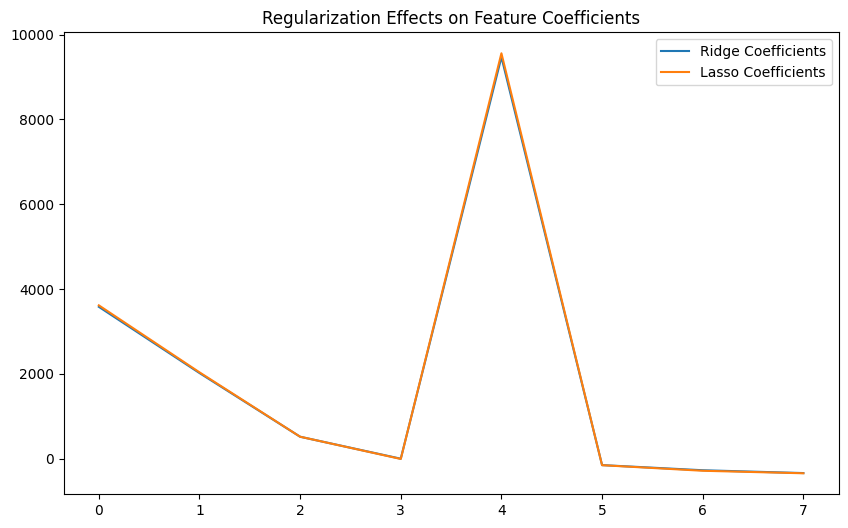

In [14]:
import matplotlib.pyplot as plt

best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_

# Get coefficient arrays
coef_ridge = best_ridge.coef_
coef_lasso = best_lasso.coef_

plt.figure(figsize=(10,6))
plt.plot(coef_ridge, label="Ridge Coefficients")
plt.plot(coef_lasso, label="Lasso Coefficients")
plt.legend()
plt.title("Regularization Effects on Feature Coefficients")
plt.show()


R² Score: 0.7835410749121385
RMSE: 5796.979691180858


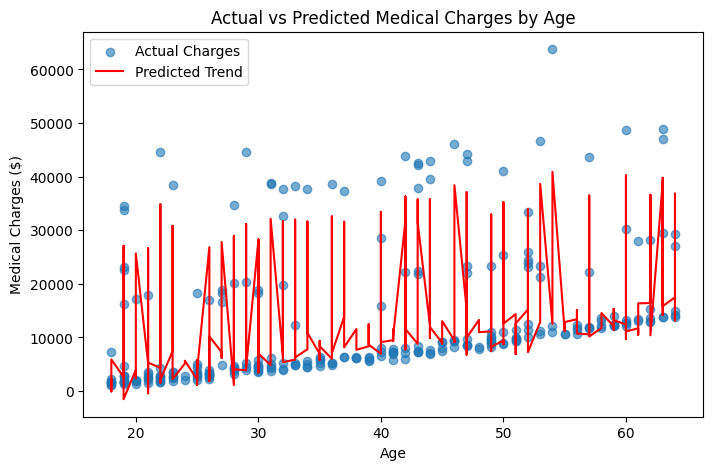

In [21]:
'''
Analyze how medical insurance charges vary with age and other factors, and predict
future charges for individuals based on their demographic and lifestyle data.
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv("./insurance/insurance.csv")

# One-hot encode categorical columns
X = pd.get_dummies(df.drop("charges", axis=1), drop_first=True)
y = df["charges"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Predictions
y_pred = ridge.predict(X_test_scaled)

# Evaluate model
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Compare actual vs predicted for Age
age_test = X_test["age"]  # original unscaled age
comparison_df = pd.DataFrame({
    "Age": age_test,
    "Actual Charges": y_test,
    "Predicted Charges": y_pred
}).sort_values(by="Age")

# Plot
plt.figure(figsize=(8,5))
plt.scatter(comparison_df["Age"], comparison_df["Actual Charges"], label="Actual Charges", alpha=0.6)
plt.plot(comparison_df["Age"], comparison_df["Predicted Charges"], color="red", label="Predicted Trend")
plt.xlabel("Age")
plt.ylabel("Medical Charges ($)")
plt.title("Actual vs Predicted Medical Charges by Age")
plt.legend()
plt.show()

In [23]:
from google.colab import files
uploaded = files.upload()


Saving insurance.csv to insurance.csv


In [25]:
# Install dependencies (if not already installed in Colab)
!pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

# Load dataset from Kaggle (if you have it in Colab already)
# You can upload manually or mount Google Drive
df = pd.read_csv("insurance.csv")  # Make sure 'insurance.csv' is in your working dir

# Select only 'age' as feature and 'charges' as target
X = df[['age']]
y = df['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature (good for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# L1 Regularization (Lasso)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# L2 Regularization (Ridge)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Function to predict charges based on age
def predict_charges(age):
    age_scaled = scaler.transform([[age]])
    l1_pred = lasso.predict(age_scaled)[0]
    l2_pred = ridge.predict(age_scaled)[0]
    return l1_pred, l2_pred

# Example prediction
age_input = 45
l1_charge, l2_charge = predict_charges(age_input)

print(f"Predicted charges for age {age_input}:")
print(f"L1 (Lasso) Prediction: ${l1_charge:.2f}")
print(f"L2 (Ridge) Prediction: ${l2_charge:.2f}")


Predicted charges for age 45:
L1 (Lasso) Prediction: $14703.73
L2 (Ridge) Prediction: $14702.51


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
